<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_4/ResNet_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mnist classifier using Keras [ResNet]

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning'

Mounted at /content/gdrive


In [0]:
nbr_of_clases = 10
validation_percentage = 0.2
resnet_path = '/content/gdrive/My Drive/Deep_Learning/mnist/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

training_data = pd.read_csv('/content/gdrive/My Drive/Deep_Learning/mnist/train_mnist.csv')

In [0]:
def prepare_data_for_resnet50(data_to_transform):
    data = data_to_transform.copy().values
    data = data.reshape(-1, 28, 28) / 255
    data = X_rgb = np.stack([data, data, data], axis=-1)
    return data

In [0]:
y = training_data.pop('label').values
X = training_data

y = keras.utils.to_categorical(y, nbr_of_clases)
X_rgb = prepare_data_for_resnet50(X)

X_train, X_val, y_train, y_val = train_test_split(X_rgb, y, test_size=validation_percentage)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications.resnet50 import ResNet50

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_path))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(124, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(nbr_of_clases, activation='softmax'))

# model.layers[0].trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
def fit_model(model, epochs=1, train_test_split=0.0):
    model.fit(X_rgb, y, epochs=epochs, validation_split=train_test_split)
    
def get_fitted_data_generator(data):
    data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                                   height_shift_range=0.1, zoom_range=0.1)
    data_generator.fit(data)
    return data_generator
    
def fit_model_generator(model, X_train, y_train, epochs=1, batch=32, validation_data=False, X_val=None, y_val=None):
    image_nbr = np.size(X_train, 0)
    training_data_generator = get_fitted_data_generator(X_train)
    
    if validation_data:
        return model.fit_generator(training_data_generator.flow(X_train, y_train, batch_size=batch), steps_per_epoch=(image_nbr//batch),
                        epochs=epochs, validation_data=(X_val, y_val), verbose=1)
    else:
        return model.fit_generator(training_data_generator.flow(X_train, y_train, batch_size=batch), steps_per_epoch=(image_nbr//batch),
                        epochs=epochs, verbose=1)

In [11]:
model_history = fit_model_generator(model, X_train, y_train, epochs=1, 
                                    validation_data=True, X_val=X_val, y_val=y_val)

Epoch 1/1
1050/1050 [==============================] - 140s 133ms/step - loss: 0.7406 - accuracy: 0.8485 - val_loss: 0.7714 - val_accuracy: 0.7807


In [0]:
def get_predictions(model, data):
    return np.array([np.argmax(prediction) for prediction in model.predict(data)])

In [13]:
predicted = get_predictions(model, X_val)
pd.Series(predicted).value_counts()

8    1840
2    1157
6     972
3     941
9     742
0     702
4     648
5     554
1     532
7     312
dtype: int64

In [14]:
pd.Series([np.argmax(i) for i in y_val]).value_counts()

1    955
3    894
7    875
6    860
4    846
2    827
9    826
0    796
8    790
5    731
dtype: int64

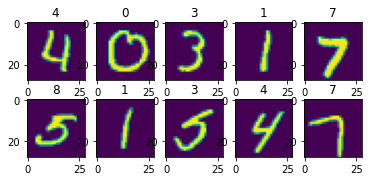

In [15]:
show_images = 10

for i in range(show_images):
    plt.subplot(show_images // 5 + 1, 5, i + 1)
    plt.title(str(predicted[i]))
    plt.imshow(X_val[i, :, :, 1].reshape(28, 28))

In [0]:
# Hyper params
final_epochs = 5

In [17]:
# Fit on all data
full_data_model = fit_model_generator(model, X_rgb, y, epochs=final_epochs, validation_data=False)

Epoch 1/5
1312/1312 [==============================] - 148s 113ms/step - loss: 0.6629 - accuracy: 0.8691
Epoch 2/5
1312/1312 [==============================] - 153s 117ms/step - loss: 0.4254 - accuracy: 0.9064
Epoch 3/5
1312/1312 [==============================] - 154s 118ms/step - loss: 0.3986 - accuracy: 0.9168
Epoch 4/5
1312/1312 [==============================] - 154s 118ms/step - loss: 0.3102 - accuracy: 0.9326
Epoch 5/5
1312/1312 [==============================] - 155s 118ms/step - loss: 0.3167 - accuracy: 0.9323
